## 逐步构建你的深度神经网络
欢迎来到第4周作业的第1部分！在此之前你已经训练了一个2层的神经网络（只有一个隐藏层）。本周，你将学会构建一个任意层数的深度神经网络！

- 在此作业中，你将实现构建深度神经网络所需的所有函数。
- 在下一个作业中，你将使用这些函数来构建一个用于图像分类的深度神经网络。

**完成此任务后，你将能够**：

- 使用ReLU等非线性单位来改善模型
- 建立更深的神经网络（具有1个以上的隐藏层）
- 实现一个易于使用的神经网络类

**符号说明**：
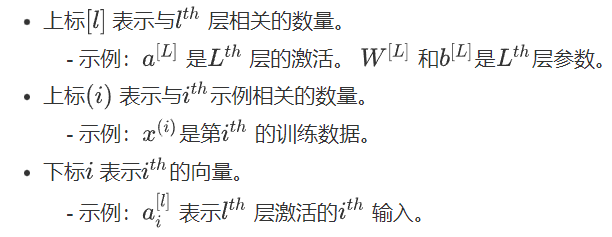

让我们开始吧！

### 1 安装包
让我们首先导入作业过程中需要的所有包。

- numpy是Python科学计算的基本包。
- matplotlib是在Python中常用的绘制图形的库。
- dnn_utils为此笔记本提供了一些必要的函数。
- testCases提供了一些测试用例来评估函数的正确性
- np.random.seed（1）使所有随机函数调用保持一致。 这将有助于我们评估你的作业，请不要改变seed。

In [1]:
cd ../input/deeplearning46278 # 当前目录为jupyter所在目录的话，这步可以省略

[WinError 3] 系统找不到指定的路径。: '../input/deeplearning46278 # 当前目录为jupyter所在目录的话，这步可以省略'
C:\Users\15831\input\ng_deeplearning\01.Neural-Networks-and-Deep-Learning\week4\cn_version


In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### 2 作业大纲
为了构建你的神经网络，你将实现几个“辅助函数”。这些辅助函数将在下一个作业中使用，用来构建一个两层神经网络和一个L层的神经网络。你将实现的每个函数都有详细的说明，这些说明将指导你完成必要的步骤。此作业的大纲如下：

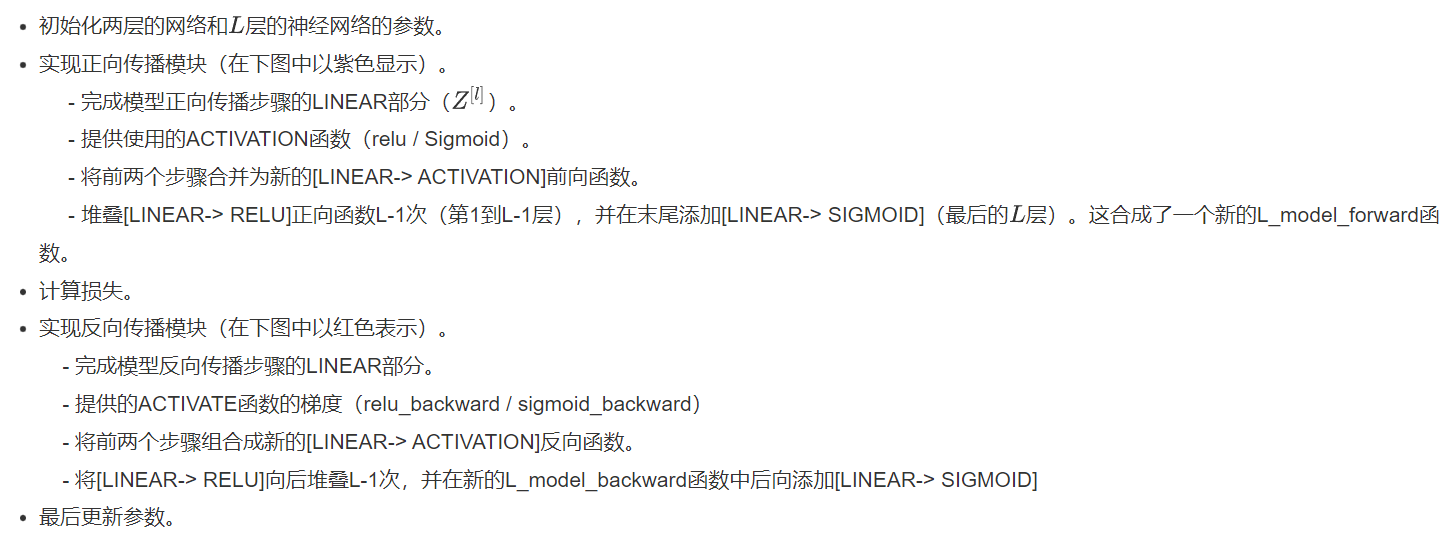

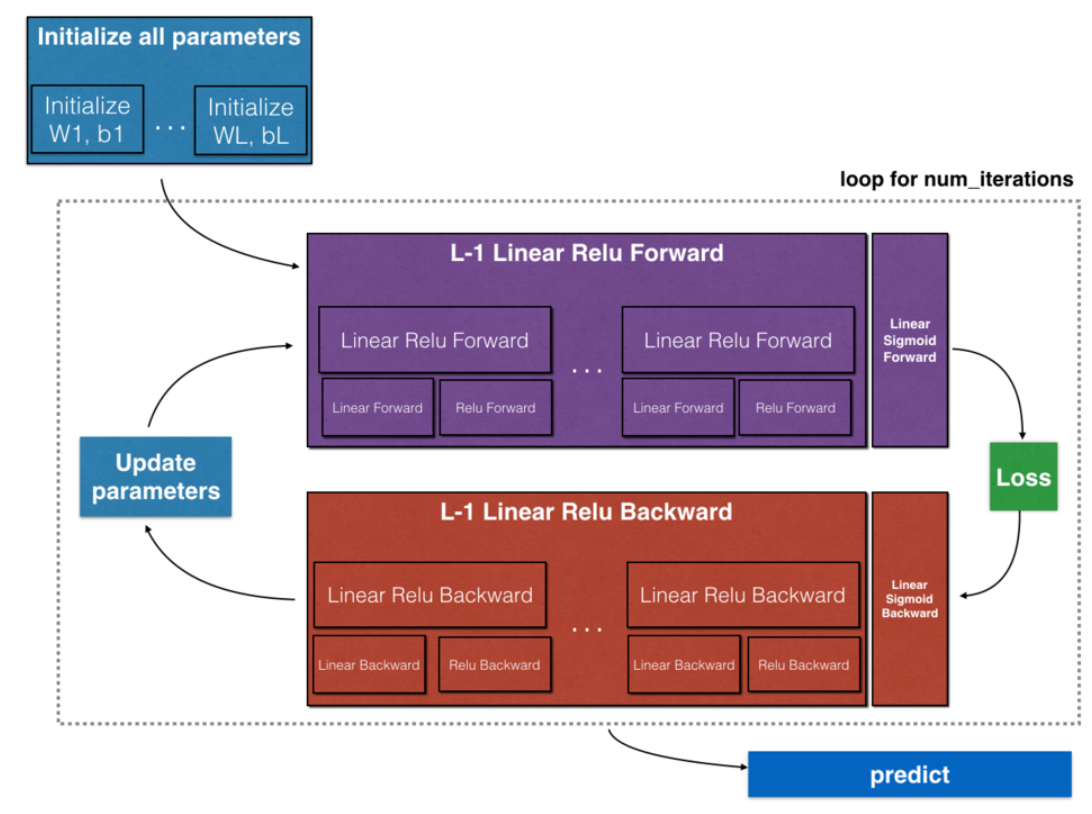
**图1**

**注意**：对于每个正向函数，都有一个对应的反向函数。 这也是为什么在正向传播模块的每一步都将一些值存储在缓存中的原因。缓存的值可用于计算梯度。 然后，在反向传导模块中，你将使用缓存的值来计算梯度。 此作业将指导说明如何执行这些步骤。

### 3 初始化

首先编写两个辅助函数用来初始化模型的参数。 第一个函数将用于初始化两层模型的参数。 第二个将把初始化过程推广到L层模型上。

#### 3.1 2层神经网络
**练习**：创建并初始化2层神经网络的参数。

**说明**：

- 模型的结构为：LINEAR -> RELU -> LINEAR -> SIGMOID。
    - 这里的linear表示线性函数（Z=WT+B）,Z经过激活函数relu后得到激活值A
- 随机初始化权重矩阵。 确保准确的维度，使用np.random.randn（shape）* 0.01。
- 将偏差初始化为0。 使用np.zeros（shape）。


In [3]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [4]:
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


**预期输出**:
W1 = [[ 0.01624345 -0.00611756]
[-0.00528172 -0.01072969]]

b1 = [[0.]
[0.]]

W2 = [[ 0.00865408 -0.02301539]]

b2 = [[0.]]

### 3.2 L层神经网络

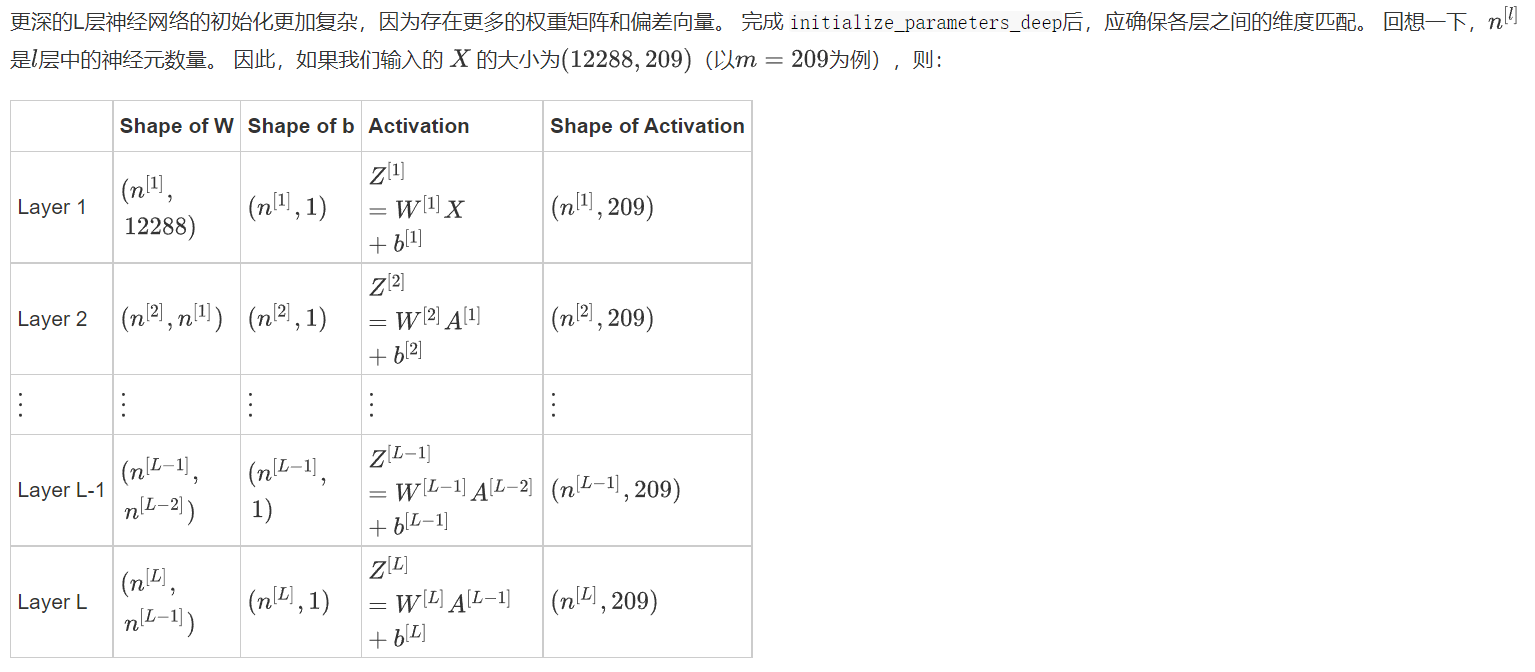

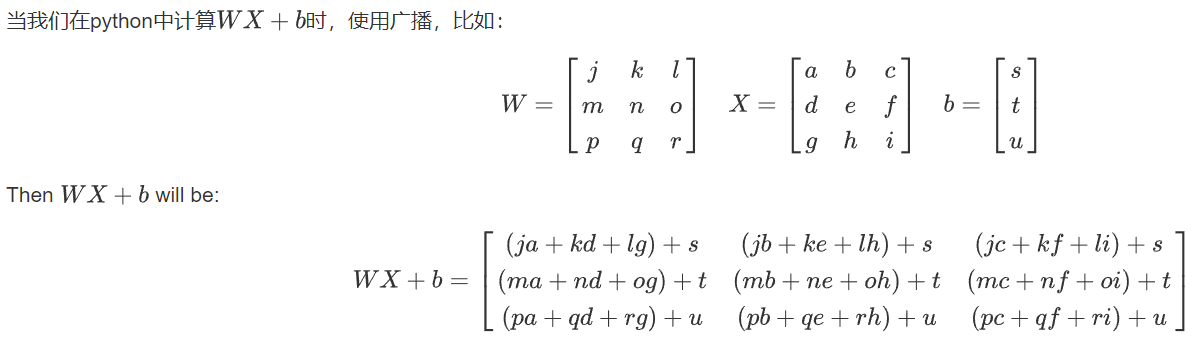

**练习**：实现L层神经网络的初始化。

**说明**：
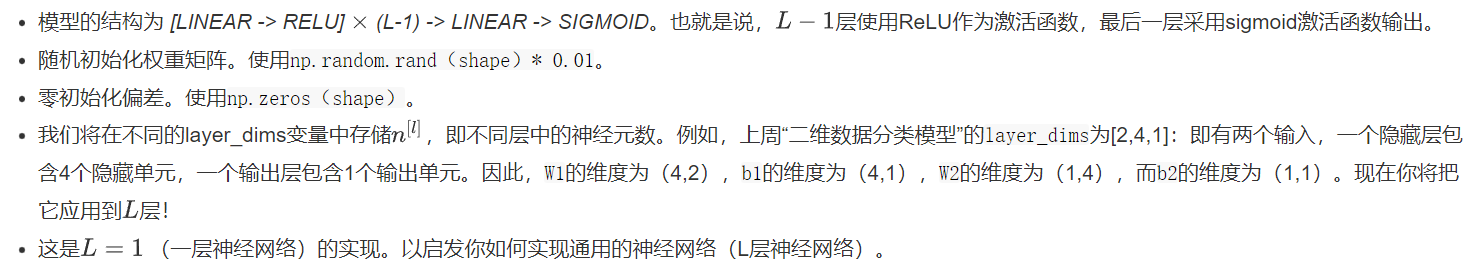
```python
if L == 1:  
      parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01  
      parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

- 我：这里`一层神经网络`应该改为单隐层

In [5]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

- 我：输入的dimension包含了输入层；所以虽然`range(1, L)`是左闭右开的，但是得到的parameters的列数==神经网络的层数==隐藏层数+输出层一层

In [6]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


**预期输出**:

W1 = [[ 0.01788628 0.0043651 0.00096497 -0.01863493 -0.00277388]
[-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
[-0.01313865 0.00884622 0.00881318 0.01709573 0.00050034]
[-0.00404677 -0.0054536 -0.01546477 0.00982367 -0.01101068]]

b1 = [[0.]
[0.]
[0.]
[0.]]

W2 = [[-0.01185047 -0.0020565 0.01486148 0.00236716]
[-0.01023785 -0.00712993 0.00625245 -0.00160513]
[-0.00768836 -0.00230031 0.00745056 0.01976111]]

b2 = [[0.]
[0.]
[0.]]

### 4 正向传播模块

#### 4.1 线性正向

现在，你已经初始化了参数，接下来将执行正向传播模块。 首先实现一些基本函数，用于稍后的模型实现。按以下顺序完成三个函数：
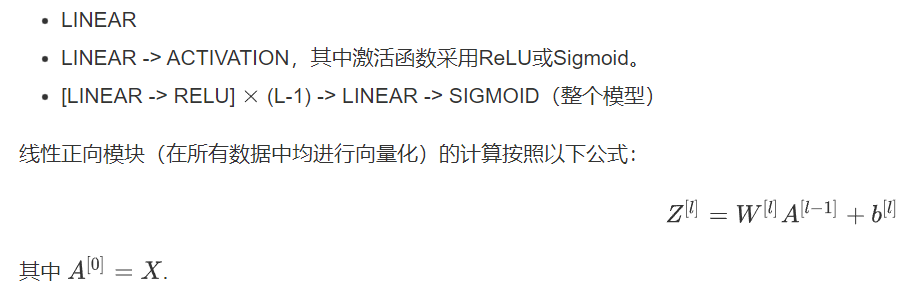

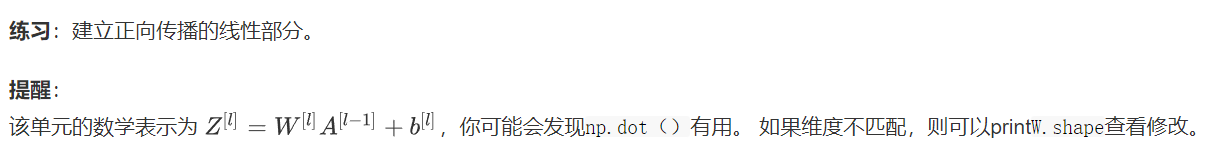

In [8]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


- 问问问：为什么不把Z也放到cache中？

In [9]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**预期输出**:
    
Z = [[ 3.26295337 -1.23429987]]

#### 4.2 正向线性激活
在此笔记本中，你将使用两个激活函数：

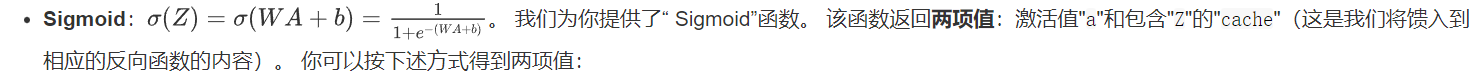
`A, activation_cache = sigmoid(Z)`

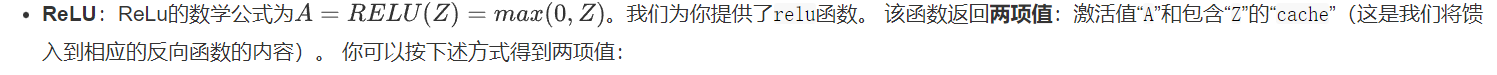
`A, activation_cache = relu(Z)`

为了更加方便，我们把两个函数（线性和激活）组合为一个函数（LINEAR-> ACTIVATION）。 因此，我们将实现一个函数用以执行LINEAR正向步骤和ACTIVATION正向步骤。

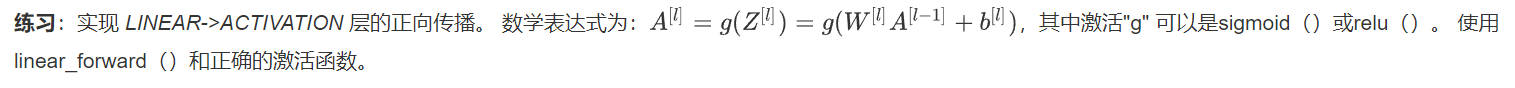

In [10]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

- 我：观察可知，函数的返回值除了自己本身需要计算得到的值外，也把输入也存入cache并返回！

In [11]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**预期输出**:

With sigmoid: A = [[0.96890023 0.11013289]]

With ReLU: A = [[3.43896131 0. ]]

**注意**：在深度学习中，"[LINEAR->ACTIVATION]"计算被视为神经网络中的单个层，而不是两个层。

#### 4.3 L层模型
为了方便实现L层神经网络，你将需要一个函数来复制前一个函数（使用RELU的linear_activation_forward）L-1次，以及复制带有SIGMOID的linear_activation_forward。

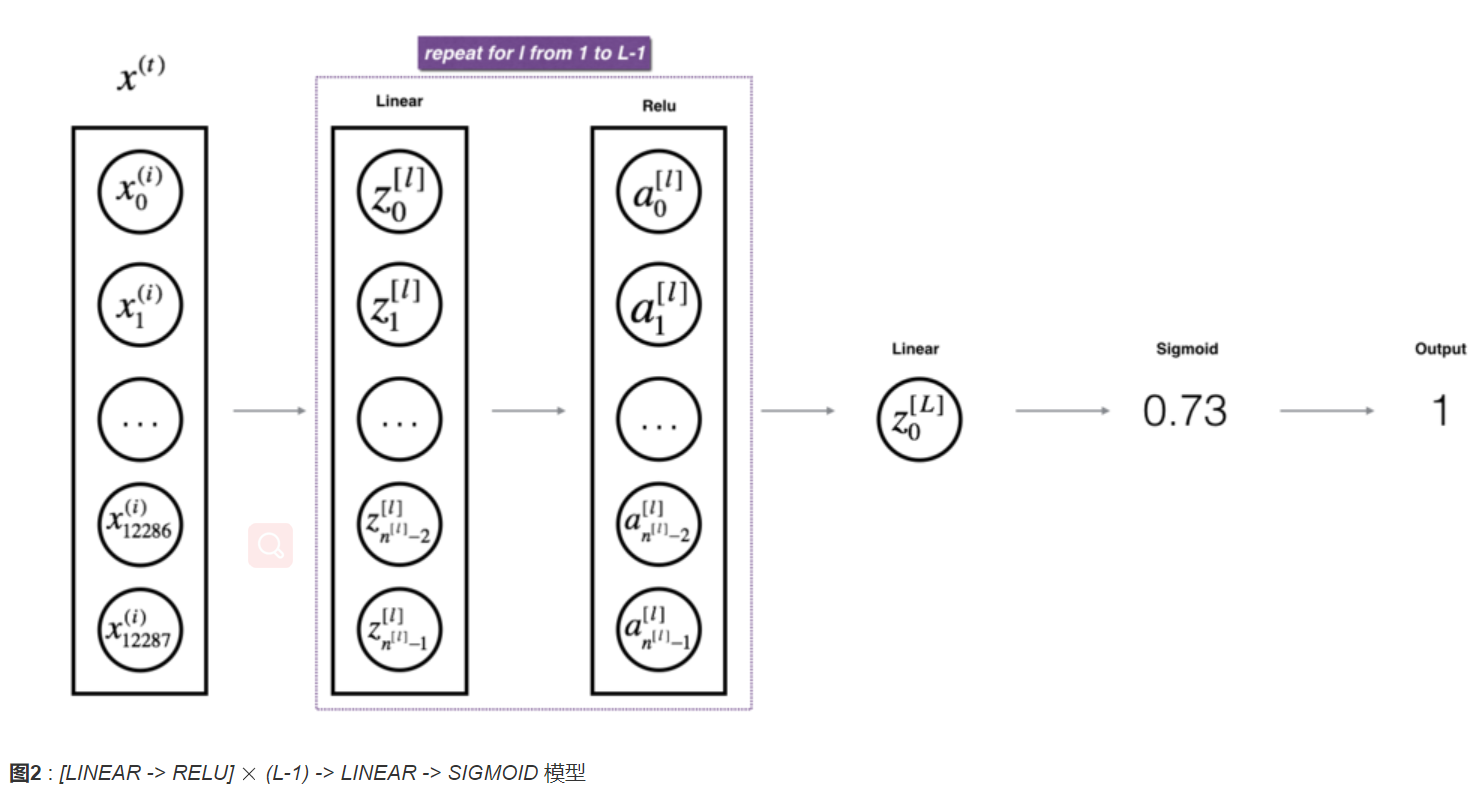

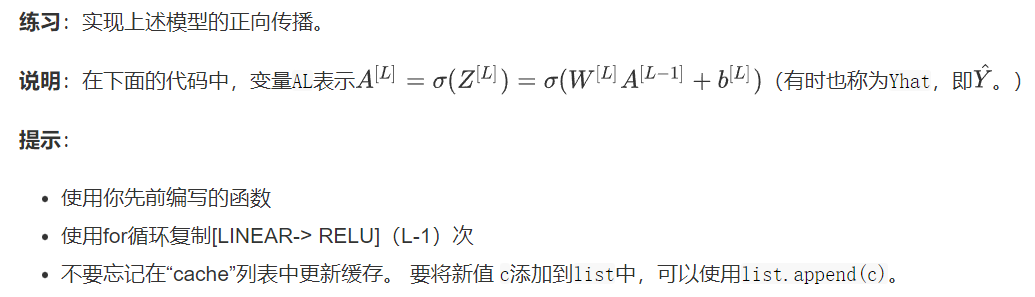

In [13]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
         ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation = "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)],activation = "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

- 我：`// 2 `表示除以2并向下取整，[参考](https://m.php.cn/article/454119.html)。因为paremeter针对每层（隐藏层+输出层）都有两个参数WL和bL，所以parameters的总参数数目除以2即为神经网络的层数。**理解这里的关键，就是理解initialize_parameters_deep()返回的元素数目是神经网络层数的两倍**。

In [16]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


**预期输出**:
    
AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2



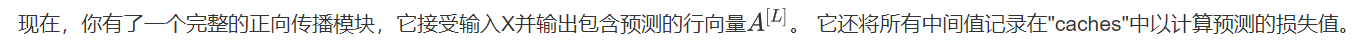

### 5 损失函数

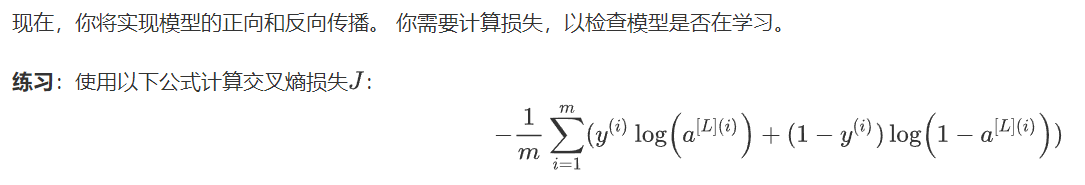

In [17]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1 / m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL),axis=1,keepdims=True)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

- 我：`*`表示矩阵或向量的对应位置元素相乘，[参考](https://blog.csdn.net/Bernie_double/article/details/109006139)；这里加号应该也是对应位置元素相加；np.sum是把元素相乘相加得到的向量的各项求和，这也对应了上图给定的公式。

In [18]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


**预期输出**:

cost = 0.41493159961539694

### 6 反向传播模块

就像正向传播一样，你将实现辅助函数以进行反向传播。 请记住，反向传播用于计算损失函数相对于参数的梯度。

**提醒**：
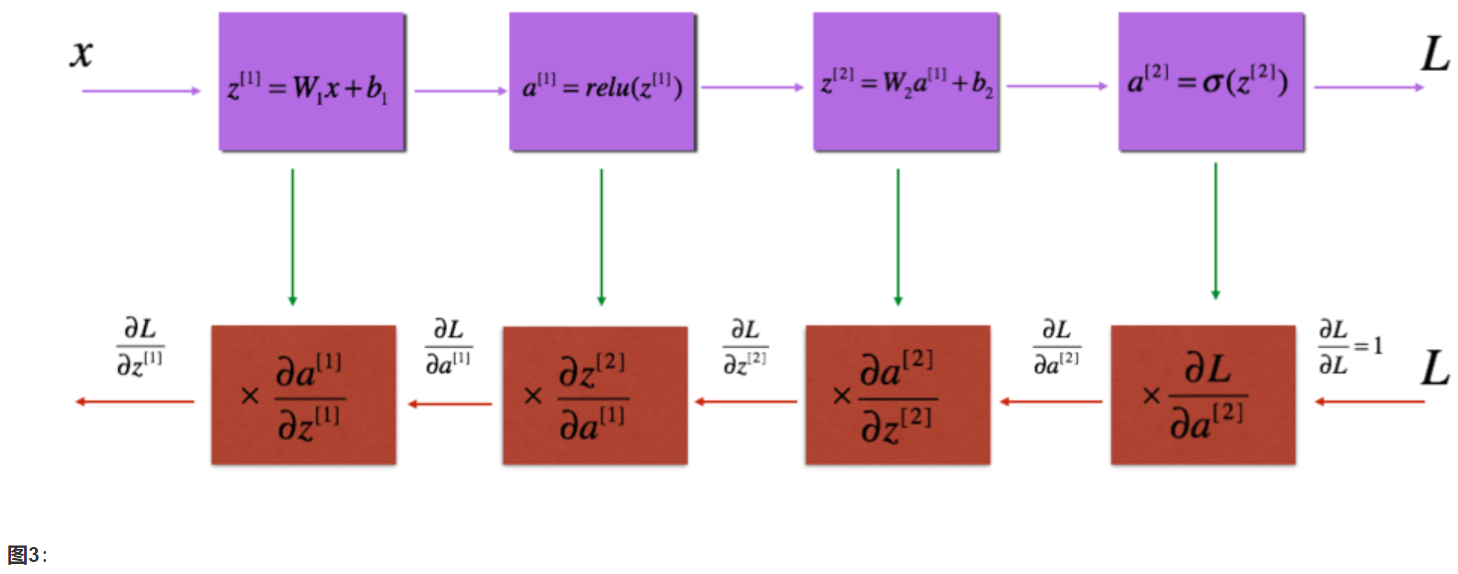

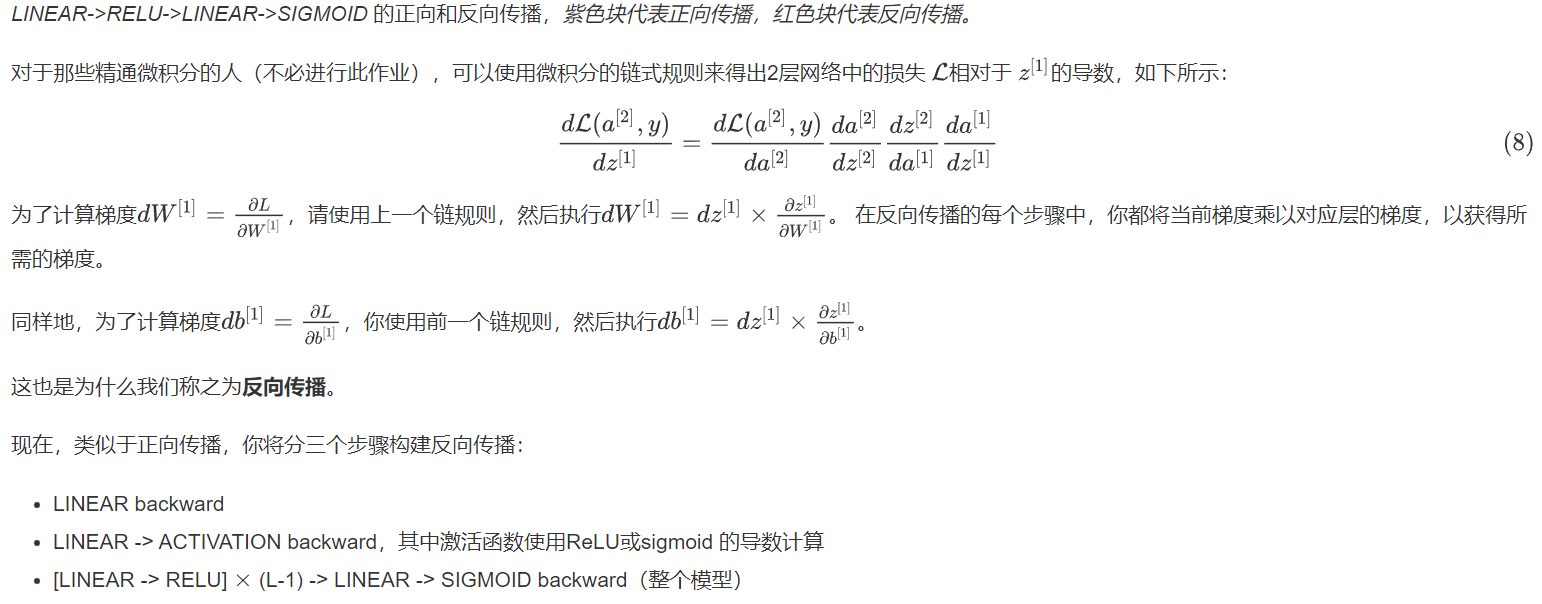

#### 6.1 线性反向

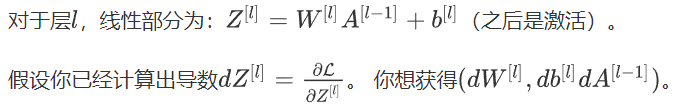

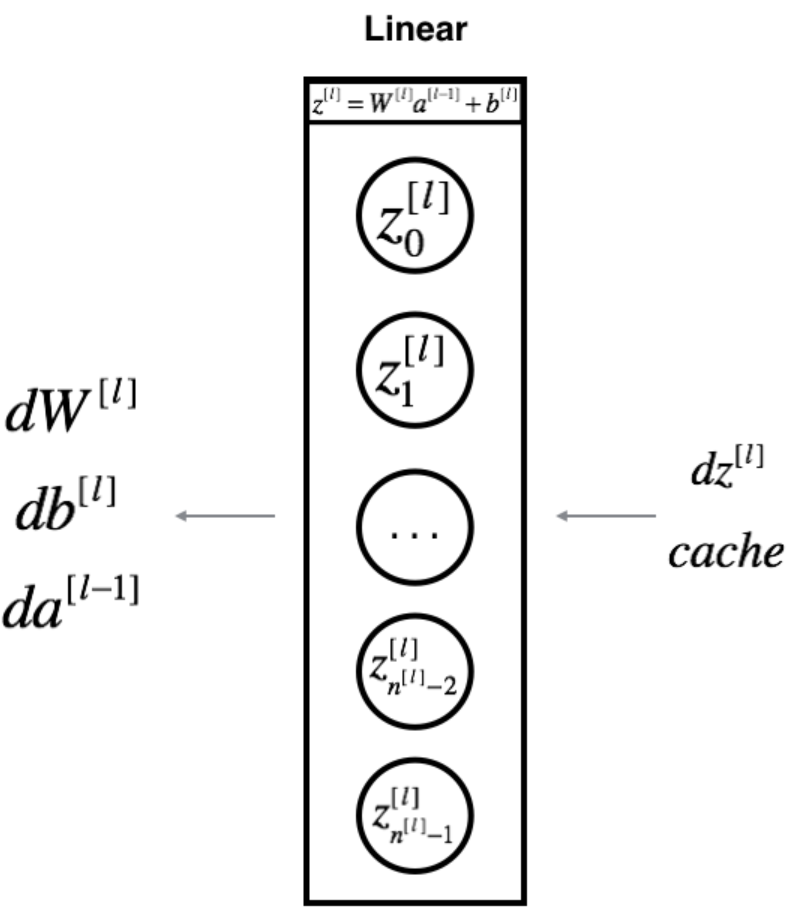

**练习**：使用上面的3个公式实现linear_backward（）。

In [1]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
   ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1 / m * np.dot(dZ ,A_prev.T)
    db = 1 / m * np.sum(dZ,axis = 1 ,keepdims=True)
    dA_prev = np.dot(W.T,dZ) 
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [4]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


- 我：jupyter有时候报错说“找不到linear_backward_test_case”，再执行一下引入linear_backward_test_case的代码块就行了。

**预期输出**:

dA_prev = [[ 0.51822968 -0.19517421]
[-0.40506361 0.15255393]
[ 2.37496825 -0.89445391]]

dW = [[-0.10076895 1.40685096 1.64992505]]

db = [[0.50629448]]

#### 6.2 反向线性激活

接下来，创建一个合并两个辅助函数的函数：linear_backward 和反向步骤的激活 linear_activation_backward。

为了帮助你实现linear_activation_backward，我们提供了两个反向函数：

- sigmoid_backward：实现SIGMOID单元的反向传播。 你可以这样使用：`dZ = sigmoid_backward(dA, activation_cache)`
- relu_backward：实现RELU单元的反向传播。 你可以这样使用：`dZ = relu_backward(dA, activation_cache)`

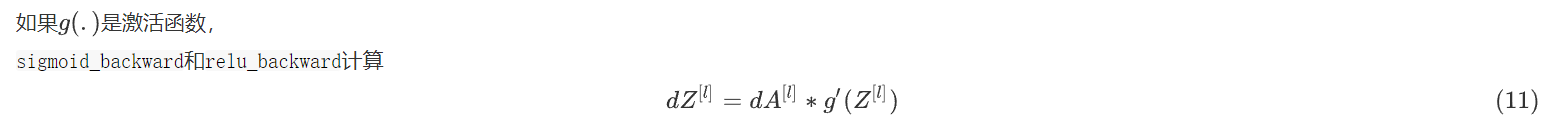

**练习**：实现LINEAR->ACTIVATION 层的反向传播。

In [5]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

- 我：这里代码把分享传播分成了：激活函数反向传播+线性反向传播

In [6]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**sigmoid 输出**:

dA_prev = [[ 0.11017994 0.01105339]
[ 0.09466817 0.00949723]
[-0.05743092 -0.00576154]]

dW = [[ 0.10266786 0.09778551 -0.01968084]]

db = [[-0.05729622]]

**relu 输出**：

dA_prev = [[ 0.44090989 0. ]
[ 0.37883606 0. ]
[-0.2298228 0. ]]

dW = [[ 0.44513824 0.37371418 -0.10478989]]

db = [[-0.20837892]]

#### 6.3 反向L层模型

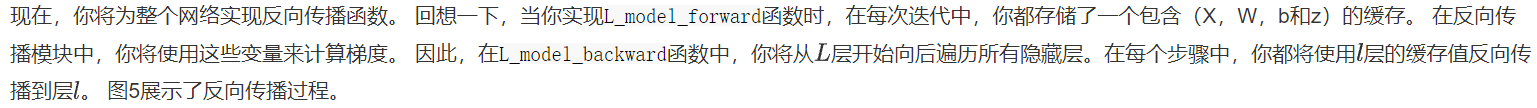

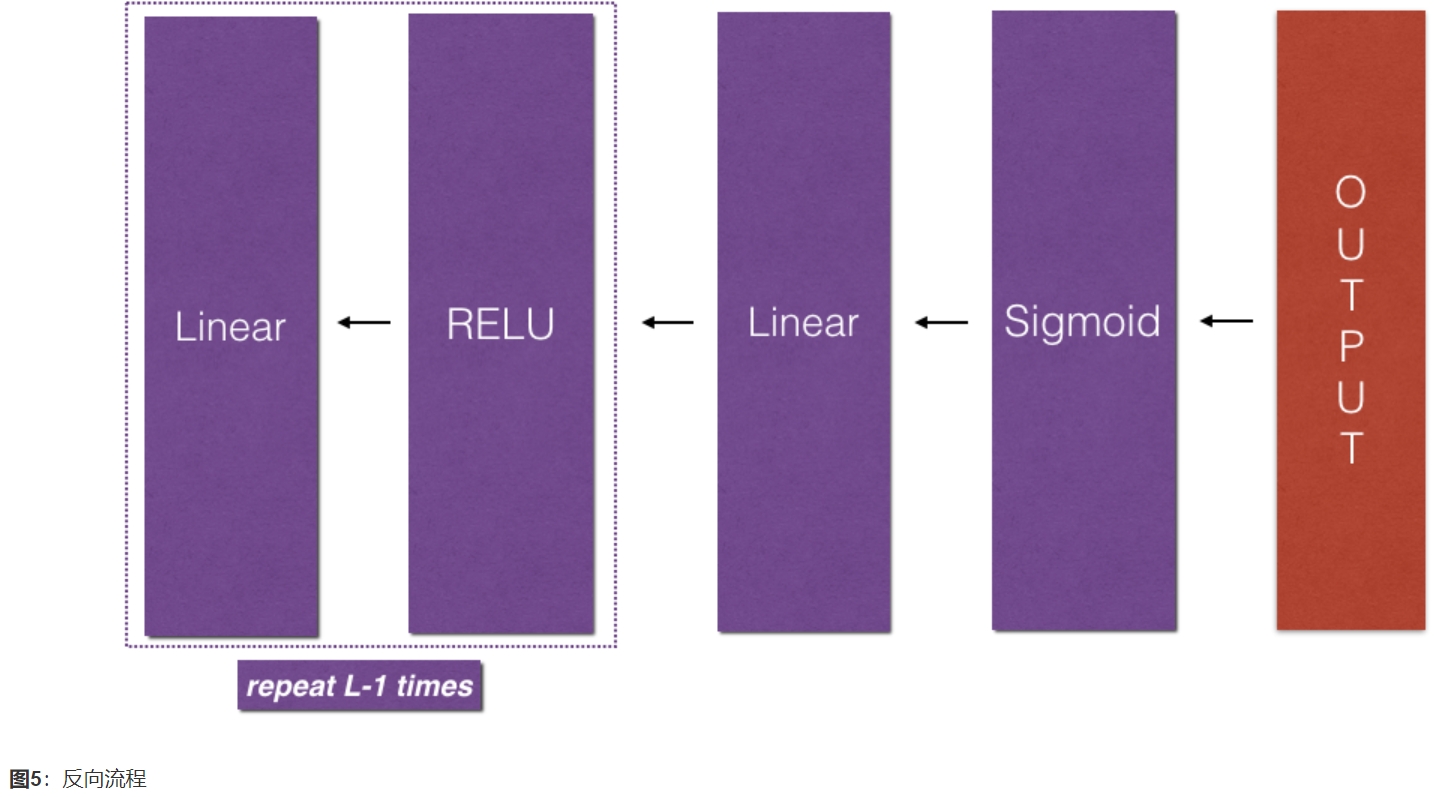

**初始化反向传播**：

为了使网络反向传播，我们知道输出是

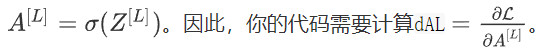

为此，请使用以下公式（不需要深入的微积分知识）：`dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL`

然后，你可以使用此激活后的梯度dAL继续反向传播。如图5所示，你现在可以将dAL输入到你实现的LINEAR-> SIGMOID反向函数中（它将使用L_model_forward函数存储的缓存值）。之后，你得通过for循环，使用LINEAR-> RELU反向函数迭代所有其他层。同时将每个dA，dW和db存储在grads词典中。为此，请使用以下公式：
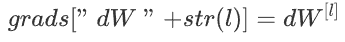

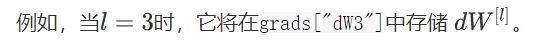


**练习：**

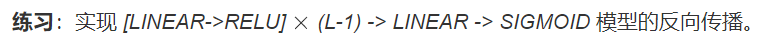

In [8]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    ### END CODE HERE ###
      
    for l in reversed(range(L - 1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###


    return grads

In [9]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


**预期输出**：

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
[0. 0. 0. 0. ]
[0.05283652 0.01005865 0.01777766 0.0135308 ]]

db1 = [[-0.22007063]
[ 0. ]
[-0.02835349]]

dA1 = [[ 0. 0.52257901]
[ 0. -0.3269206 ]
[ 0. -0.32070404]
[ 0. -0.74079187]]

#### 6.4 更新参数
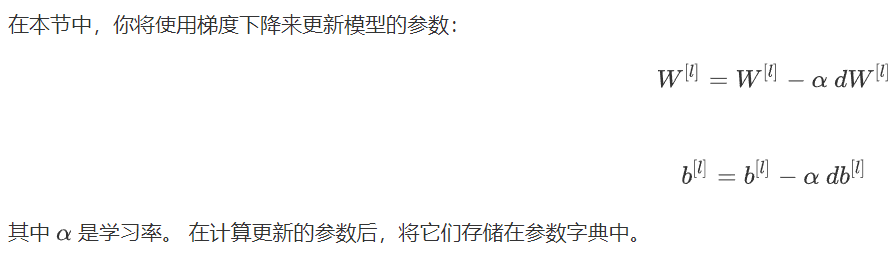

**练习**：实现update_parameters（）以使用梯度下降来更新模型参数。

**说明**：
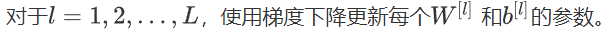

In [10]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] =  parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
        
    return parameters

In [11]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**预期输出**:

W1 = [[-0.59562069 -0.09991781 -2.14584584 1.82662008]
[-1.76569676 -0.80627147 0.51115557 -1.18258802]
[-1.0535704 -0.86128581 0.68284052 2.20374577]]

b1 = [[-0.04659241]
[-1.28888275]
[ 0.53405496]]

W2 = [[-0.55569196 0.0354055 1.32964895]]

b2 = [[-0.84610769]]

### 7 结论
恭喜你实现了构建深度神经网络所需的所有函数！

我们知道这是一项艰巨的任务，但是继续前进将变得更好。 下一部分的作业相对容易。

在下一个作业中，你将使用这些函数构建两个模型用于分类猫图像和非猫图像：

- 两层神经网络
- L层神经网络